In [19]:
import pandas as pd

# Define the data as a dictionary
data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy'],
    'Humidity': ['Normal', 'Normal', 'Normal', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low'],
    'Wind': ['Week', 'Week', 'Strong', 'Week', 'Strong', 'Strong', 'Week', 'Week', 'Strong', 'Week'],
    'Play': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)



  Weather Humidity    Wind Play
0   Sunny   Normal    Week   No
1   Sunny   Normal    Week   No
2   Sunny   Normal  Strong   No
3   Sunny     High    Week   No
4   Sunny     High  Strong   No
5   Rainy     High  Strong  Yes
6   Rainy      Low    Week  Yes
7   Rainy      Low    Week  Yes
8   Rainy      Low  Strong  Yes
9   Rainy      Low    Week  Yes


In [21]:
x = df.drop('Play', axis=1) 

In [23]:
y = df.Play

In [24]:
y

0     No
1     No
2     No
3     No
4     No
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
Name: Play, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le_x = LabelEncoder()
x = x.apply(le_x.fit_transform)

In [27]:
x

,Weather,Humidity,Wind
0,1,2,1
1,1,2,1
2,1,2,0
3,1,0,1
4,1,0,0
5,0,0,0
6,0,1,1
7,0,1,1
8,0,1,0
9,0,1,1


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30, random_state=42)

In [29]:
xtrain

,Weather,Humidity,Wind
0,1,2,1
7,0,1,1
2,1,2,0
9,0,1,1
4,1,0,0
3,1,0,1
6,0,1,1


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dect = DecisionTreeClassifier()

In [32]:
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [33]:
dect.predict(xtest)

array(['Yes', 'No', 'Yes'], dtype=object)

In [34]:
dect.score(xtest, ytest)

1.0

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
result = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
result

array([1., 1., 1., 1., 1.])

In [37]:
result.mean()

1.0

In [38]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(), x, y, cv=5)
result

array([1. , 1. , 1. , 0.5, 0.5])

In [39]:
result.mean()

0.8

In [45]:
from sklearn.neighbors import KNeighborsClassifier
result = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y, cv=5)
result

array([0.5, 1. , 1. , 0.5, 0.5])

In [41]:
result.mean()

0.7

In [42]:
y_predict = dect.predict(xtest)
y_predict

array(['Yes', 'No', 'Yes'], dtype=object)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [52]:
import numpy as np
xinput = np.array([1,0,1])

In [53]:
y_predict = dect.predict([xinput])

C:\Users\Arup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
y_predict

array(['No'], dtype=object)

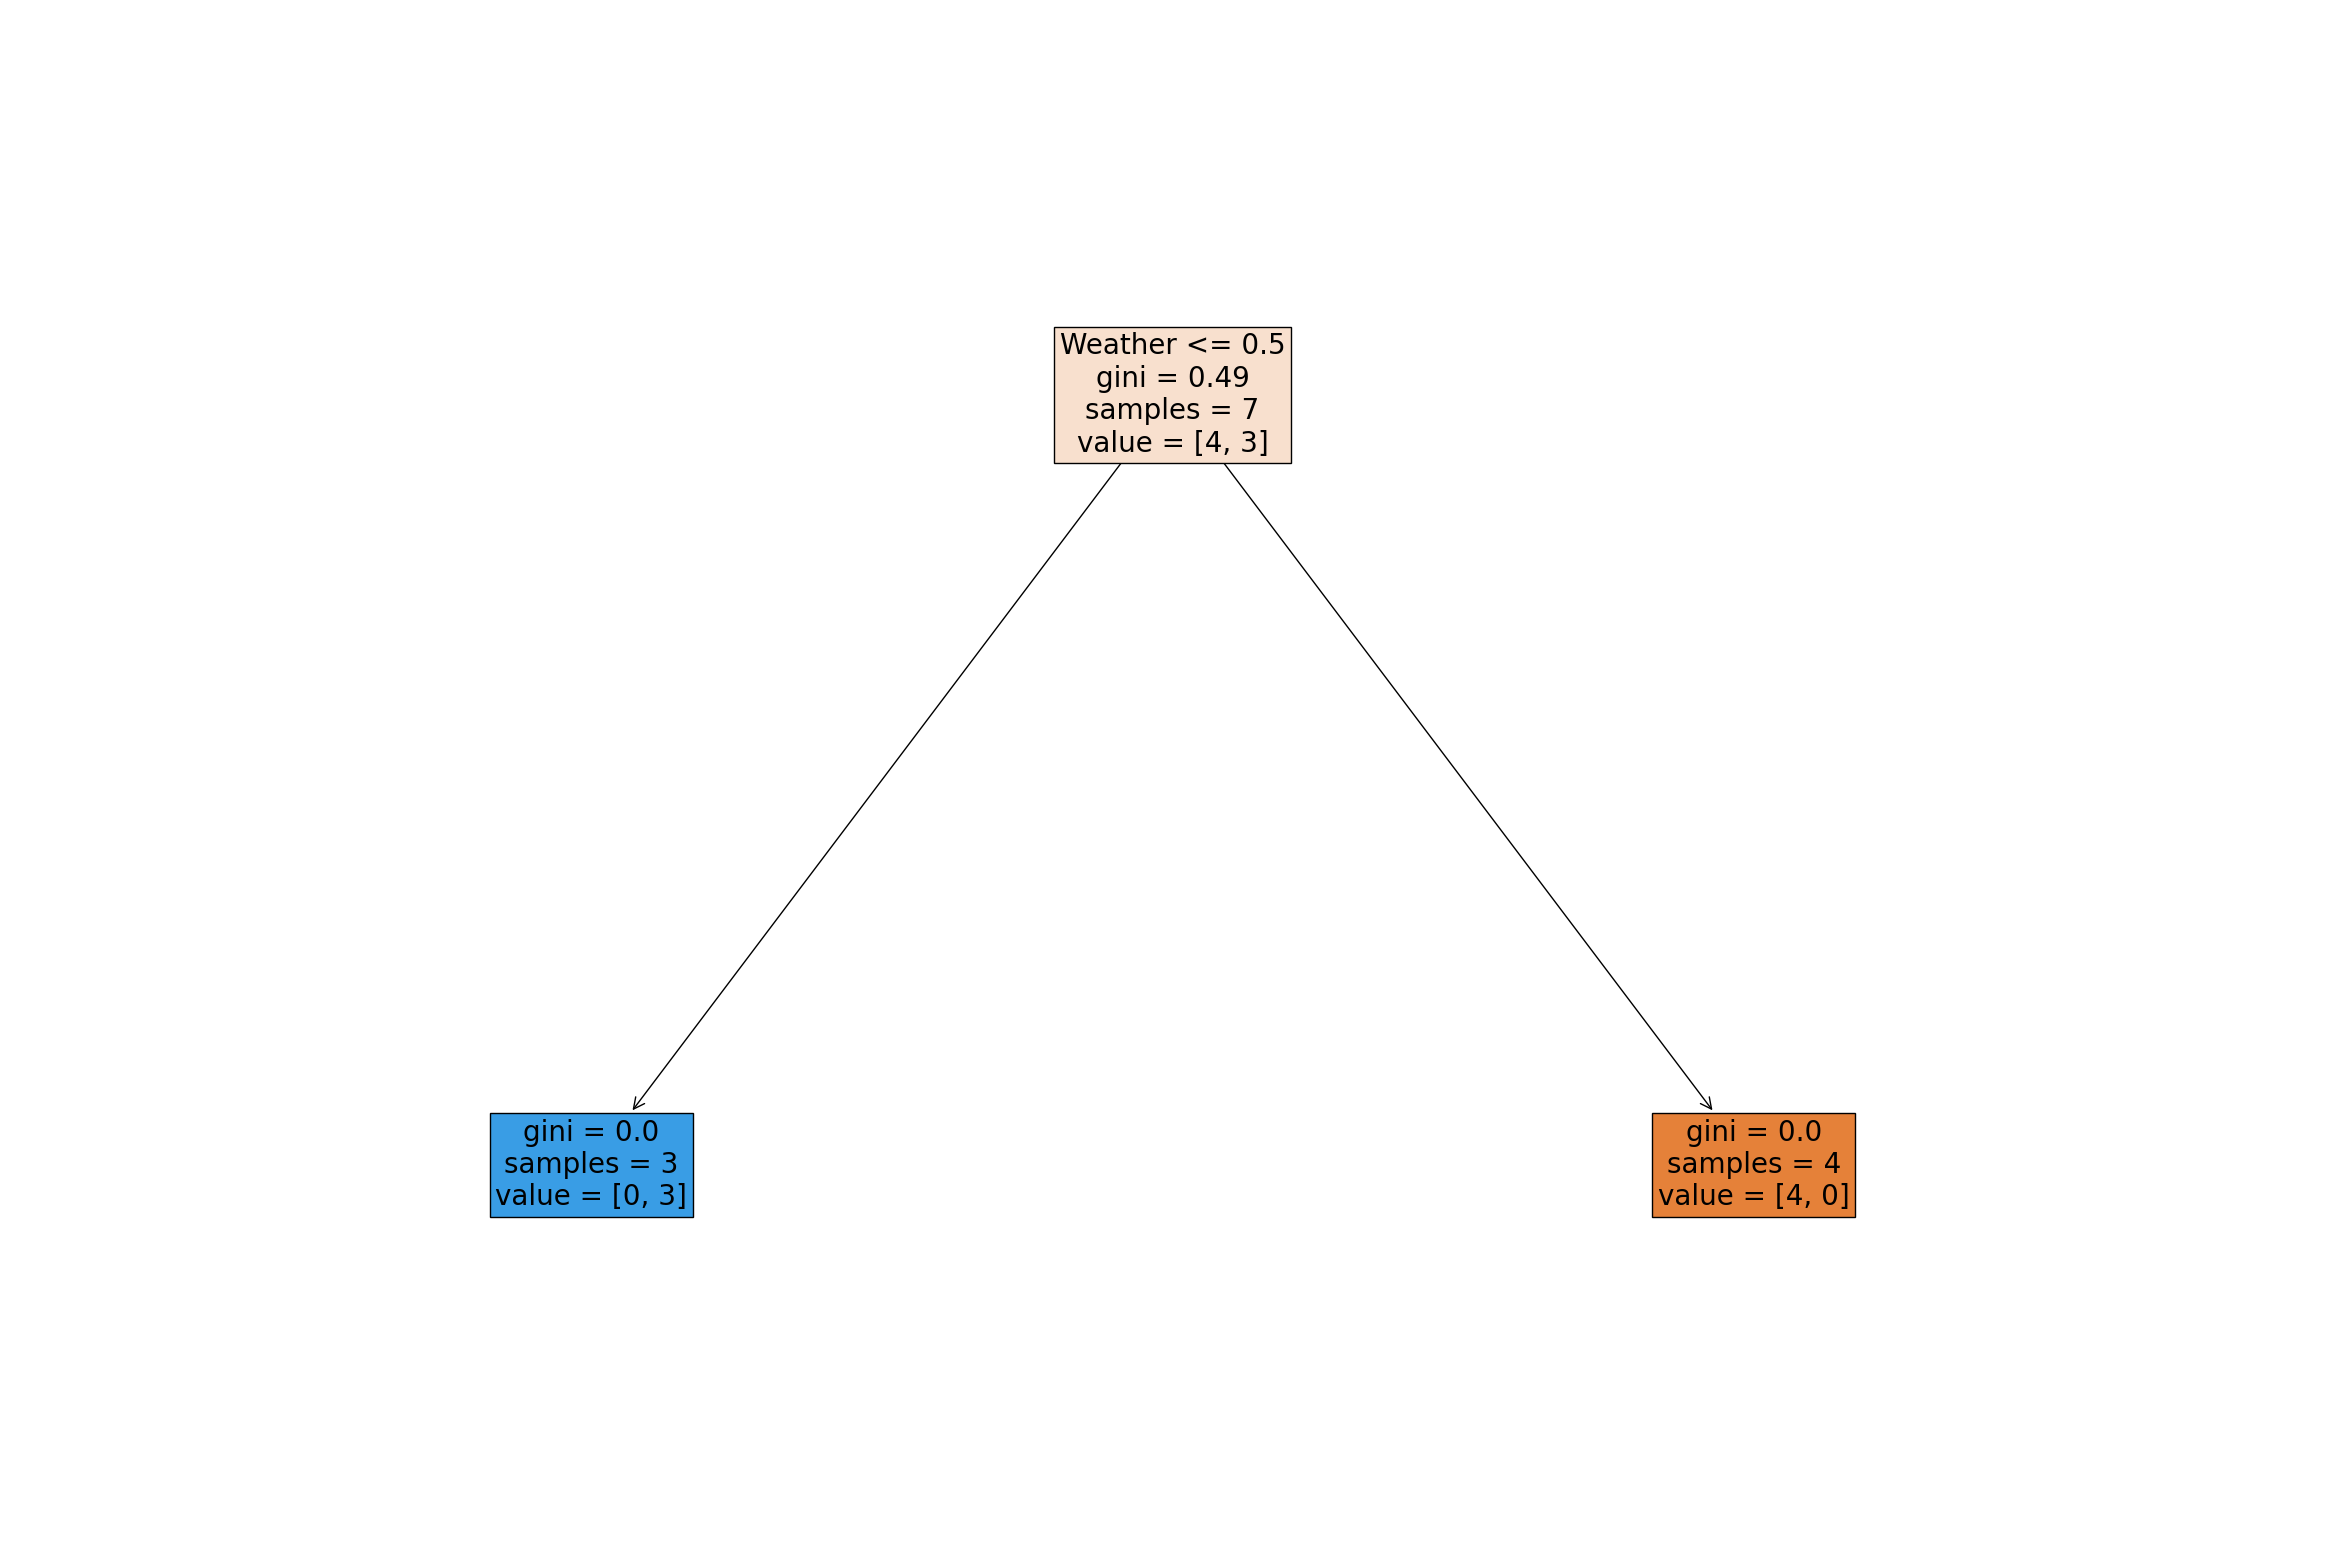

In [58]:
# from sklearn import tree
# from matplotlib import pyplot as plt
# fig=plt.figure(figsize=(30,20))
# tree.plot_tree(dect, feature_names=x.columns, filled=True, fontsize=20)


from sklearn import tree
from matplotlib import pyplot as plt

# Assuming 'x' is your DataFrame containing the feature columns
feature_names = list(x.columns)

fig = plt.figure(figsize=(30, 20))

# Replace 'dect' with your trained decision tree model
tree.plot_tree(dect, feature_names=feature_names, filled=True, fontsize=20)

plt.show()
